
## IT461 Practical Machine learning
### Used Car Prices Dataset

*Project Motivation:*

we want to develop a predictive model that determines consumer car preferences based on a comparison of key car attributes, such as price, mileage, model year, brand popularity, accident history, and fuel type. By building and training models to analyze differences between paired cars. Our project aims to identify the likelihood of one car being preferred over another, providing insights into the factors that influence car purchasing decisions.

*Prepared by:*

Jory Alharbi	443200984

Majd Aljuraysi	443200637

Deem Alshaye	443200583

Norah Mohammed Alwohaibi 	443200753

Razan Aldakhil	443201096


*dataset source:*
https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset


In [3]:
from google.colab import drive
drive.mount('/content/drive')
directory_path = '/content/drive/MyDrive/'
file_name = "/content/used_cars.csv"


Mounted at /content/drive


In [ ]:
!pip install scikeras tensorflow numpy
!pip install scikeras tensorflow numpy
!pip install scikeras


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import itertools
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
df= pd.read_csv("/content/drive/My Drive/used_cars.csv")

In [7]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## 1- Data cleaning and Inspection

we will start by cleaning or dataset to prepare it for further work, starting by checking for missing values

### Missing values

In [8]:
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

fuel_type      170
accident       113
clean_title    596
dtype: int64


since these features are signaficant for the user, and inflaunce whether the user would by the car or not, we cant just remove them from our dataset, we will fill these missing values with either the mode, mean or most common type or using clusters with the nearest values in the cluster

In [9]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

fuel type has "–" and "not supported" and needs to be handeled, we will use numpy to solve this, np.nan represents a "Not a Number" value, which is useful for handling missing values.

In [10]:
df['fuel_type'] = df['fuel_type'].replace(['–', 'not supported'], np.nan)

In [11]:
most_common_fuel_type = df['fuel_type'].mode()[0]
df['fuel_type'].fillna(most_common_fuel_type, inplace=True)

<ipython-input-11-fbd709290704>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(most_common_fuel_type, inplace=True)


In [12]:
df['clean_title'].fillna('no', inplace=True)

<ipython-input-12-354812eb3226>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].fillna('no', inplace=True)


In [13]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [14]:
# Fill missing values in the 'accident' column with 'None reported'
df['accident'] = df['accident'].fillna('None reported')


In [15]:
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [16]:
# Descriptive Statistics
print(df.describe())

        model_year
count  4009.000000
mean   2015.515590
std       6.104816
min    1974.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000


### duplicate rows

In [17]:
df_duplicates = df[df.duplicated()]

num_duplicates = df_duplicates.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


there are no duplicates rows in our dataset so it doesnt require further investigating

###removing unwanted characters

the milage and the price have "mi" and "$" in each data entry, we will remove them to work better with them

In [18]:
# Data Cleaning: Remove 'mi.' from 'milage' and '$' from 'price', then convert to numeric
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

## 2- Preprocessing

For the preprocessing section, we’ll focus on encoding categorical features and normalizing numerical ones to ensure the model performs optimally

### Encoding

In [19]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,no,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,no,34999.0
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,no,14798.0
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.0
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927.0
9,Tesla,Model X Long Range Plus,2020,34000.0,Gasoline,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,69950.0


In [20]:
df['clean_title'].unique()

array(['Yes', 'no'], dtype=object)

In [21]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [22]:
# Encode 'clean_title' column with 1 for 'Yes' and 0 for 'Missing'
df['clean_title_ecnoded'] = df['clean_title'].map({
    'Yes': 1,
    'Missing': 0
}).fillna(0).astype(int)


In [23]:
df['fuel_type_encoded'] = df['fuel_type'].astype('category').cat.codes


In [24]:
df['accident_encoded'] = df['accident'].map({
    'At least 1 accident or damage reported': 1,
    'None reported': 0
})

In [25]:
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'price' and 'milage'
df[['price_norm', 'milage_norm']] = scaler.fit_transform(df[['price', 'milage']])

###feature engineering

Feature engineering is a critical step in data preprocessing that involves transforming raw data into meaningful features to improve model performance. This process helps highlight important patterns, reduces noise, and allows machine learning models to better understand the underlying data. Here are some key feature engineering techniques applied to the dataset:

1- Binning/Grouping Numerical Features

Binning Mileage: Instead of using raw mileage,we will  group cars into mileage bins (e.g., 0-25,000 miles, 25,001-50,000 miles, etc.) to reduce the variability and make the model capture trends better.

In [26]:
mileage_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
df['mileage_bin'] = pd.cut(df['milage'], bins=mileage_bins, labels=['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k+'])


Binning Price: Group cars into price ranges (e.g., budget, mid-range, luxury) based on thresholds.

In [27]:
price_bins = [0, 20000, 50000, 100000, 200000, df['price'].max()]
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=['Budget', 'Mid-range', 'Premium', 'Luxury', 'Super Luxury'])


In [28]:
# Encode 'price_category' column
df['price_category_encoded'] = df['price_category'].astype('category').cat.codes

# Encode 'mileage_bin' column
df['mileage_bin_encoded'] = df['mileage_bin'].astype('category').cat.codes

In [29]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,price,clean_title_ecnoded,fuel_type_encoded,accident_encoded,price_norm,milage_norm,mileage_bin,price_category,price_category_encoded,mileage_bin_encoded
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,10300.0,1,1,1,0.002812,0.125710,50k-75k,Budget,0,2
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,38005.0,1,2,1,0.012196,0.085557,25k-50k,Mid-range,1,1
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,54598.0,0,2,0,0.017817,0.055006,0-25k,Premium,2,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,15500.0,1,3,0,0.004573,0.219313,75k-100k,Budget,0,3
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,34999.0,0,2,0,0.011178,0.024043,0-25k,Mid-range,1,0


2- Creating new features

Brand Popularity
Creating a feature that represents the popularity of a car brand by counting how many cars of each brand are in the dataset. Popular brands might have higher resale values.

In [30]:
df['brand_popularity'] = df['brand'].map(df['brand'].value_counts())


Create a feature that represents the age of a car by calculating the difference between the current year and the car's model year. Older cars tend to have different pricing and usage patterns compared to newer models, and the age feature helps capture this information.

In [31]:
df['car_age'] = 2024 - df['model_year']

# Check for zeros in the car_age column
if (df['car_age'] == 0).any():
    # Optional: Drop rows with zero car_age or handle as needed
    df = df[df['car_age'] != 0]  # Drop rows with zero car_age


In [32]:
has_zeros = (df['car_age'] == 0).any()
print(f"Are there any zeros in 'car_age'? {has_zeros}")

Are there any zeros in 'car_age'? False


3- Interaction Features

Mileage to Age Ratio: A feature that represents how much the car has been driven relative to its age. This can provide insight into whether the car is heavily or lightly used.

In [34]:


df['mileage_to_age_ratio'] = df['milage'] / df['car_age']



Price-to-Age Ratio: This feature would capture how expensive the car is relative to its age, helping to differentiate between cheaper older cars and expensive older models.

In [35]:
df['price_to_age_ratio'] = df['price'] / df['car_age']


In [36]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,price_norm,milage_norm,mileage_bin,price_category,price_category_encoded,mileage_bin_encoded,brand_popularity,car_age,mileage_to_age_ratio,price_to_age_ratio
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,0.002812,0.125710,50k-75k,Budget,0,2,386,11,4636.363636,936.363636
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,0.012196,0.085557,25k-50k,Mid-range,1,1,72,3,11580.666667,12668.333333
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,0.017817,0.055006,0-25k,Premium,2,0,163,2,11186.000000,27299.000000
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,0.004573,0.219313,75k-100k,Budget,0,3,59,9,9877.777778,1722.222222
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,0.011178,0.024043,0-25k,Mid-range,1,0,200,3,3278.333333,11666.333333


## 3- EDA

Visualizing Data Distributions

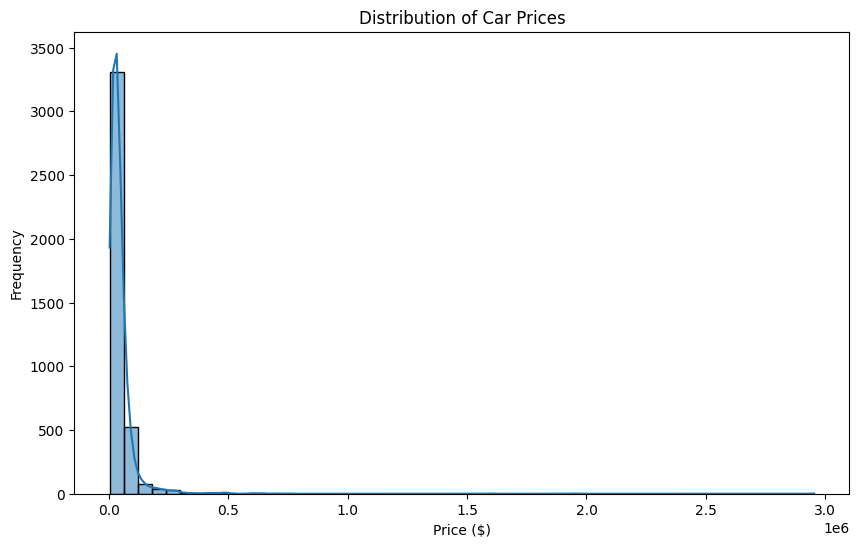

In [37]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

The output of the **car price distribution plot** shows the following:

- **Most car prices** are concentrated on the left side of the graph, close to \$0, with a high frequency of cars priced below \$100,000.
- The **peak** at the beginning indicates that a large number of cars have prices within a lower range (likely between \$10,000 and \$50,000).
- There are a few **outliers**—cars priced well over \$1 million, but these are very rare, as shown by the flat, extended tail on the right side of the plot.

This type of distribution is **right-skewed** (positively skewed), meaning there are a few extremely high prices that stretch the distribution toward higher values, but most cars are priced lower.

Data visualization

Distribution of Car Mileage


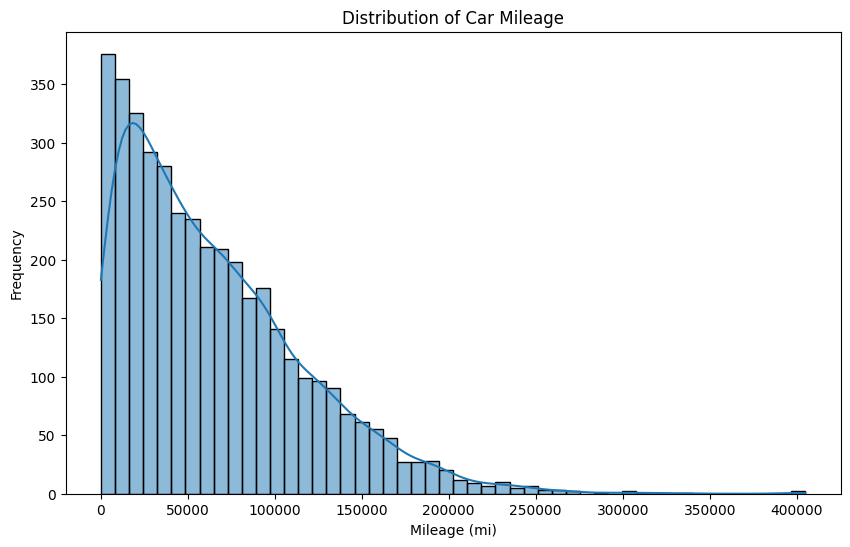

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['milage'], bins=50, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (mi)')
plt.ylabel('Frequency')
plt.show()


The graph shows the distribution of car mileage. It has a clear downward trend, indicating that cars with lower mileage are much more common than cars with higher mileage.

The graph starts with a tall peak on the left side, representing a large number of cars with relatively low mileage, likely newer or well-maintained vehicles.

As the mileage increases towards the right side of the graph, the number of cars with that mileage decreases rapidly. This reflects the reality that as cars are driven and accumulate more miles over time, there are fewer and fewer cars with higher mileage.

The shape of the graph resembles an exponential curve, which is a common way to model this kind of decreasing distribution. It shows that low-mileage cars are very common, while high-mileage cars become increasingly rare.

Mileage vs Price

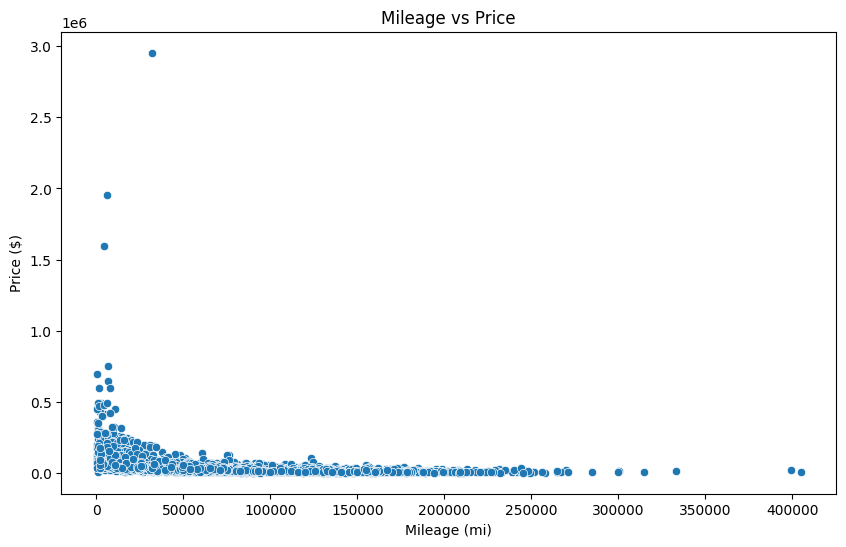

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['milage'], y=df['price'])
plt.title('Mileage vs Price')
plt.xlabel('Mileage (mi)')
plt.ylabel('Price ($)')
plt.show()


This scatter plot shows that cars with more miles tend to cost less:

Low mileage cars (under 50,000 miles) generally have higher prices.
Higher mileage cars (above 100,000 miles) mostly have lower prices.
There are a few expensive outliers (over $1 million), likely luxury or rare cars, that don't follow this trend.
 more mileage = lower price, but some special cars are priced high despite their mileage.

Model Year and Mileage Insights


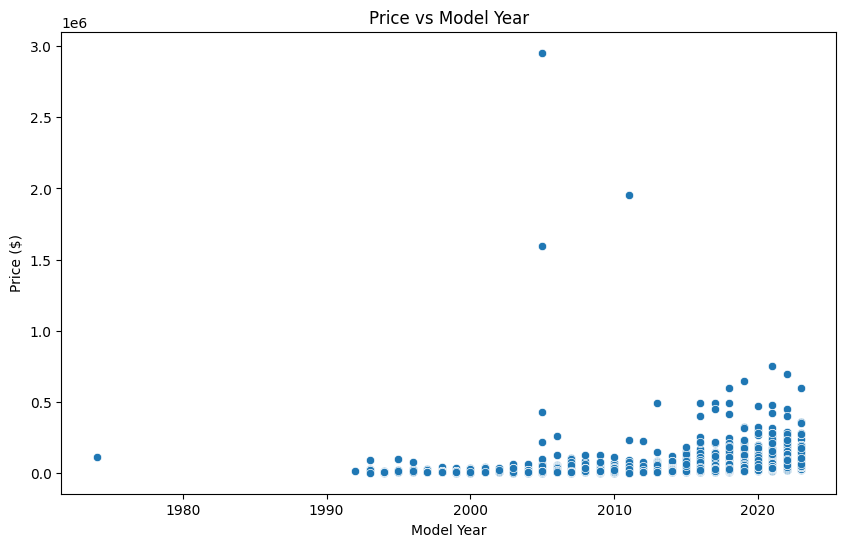

In [ ]:
# Correlation analysis
price_model_year_corr = df[['model_year', 'price']].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['model_year'], y=df['price'])
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.show()


Positive Correlation: There is a general positive trend where newer cars (more recent model years) tend to have higher prices.

Outliers: The outliers in the graph suggest that for some model years, certain cars can be significantly more expensive than average, likely due to their luxury status, rarity, or other factors.
This graph shows how car prices are largely influenced by the model year, with newer cars generally costing more, but with several high-priced outliers skewing the overall distribution.

Accident History and Its Impact on Car Prices


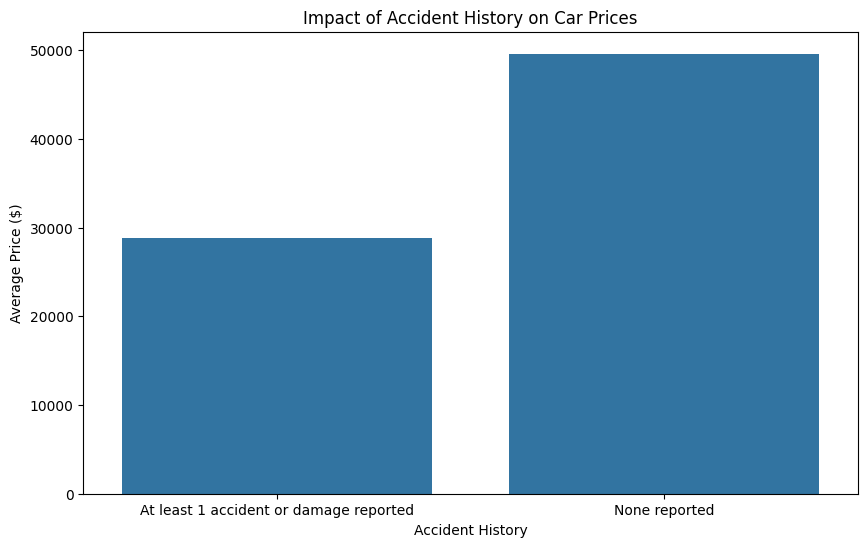

In [ ]:
# Grouping by accident history and getting the average price
accident_price_mean = df.groupby('accident')['price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=accident_price_mean.index, y=accident_price_mean.values)
plt.title('Impact of Accident History on Car Prices')
plt.xlabel('Accident History')
plt.ylabel('Average Price ($)')
plt.show()


This graph clearly shows that accident history has a strong negative impact on car prices, with cars without accidents being valued significantly higher than those with reported damage.

Count of Cars by Brand

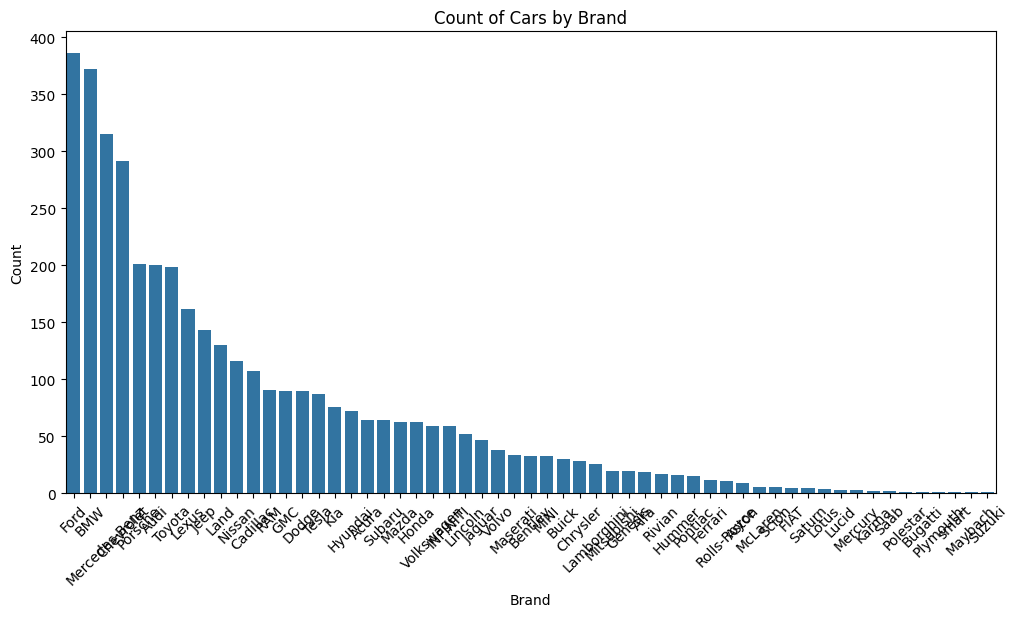

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This bar chart displays the count of cars for each brand in the dataset. The bars represent the number of listings available per brand, sorted in descending order. Brands like Ford, BMW, and Mercedes-Benz have the highest counts, indicating these are the most commonly listed cars. As we move to the right, brands like Rolls-Royce, Bugatti, and Maybach have much lower counts, showing that they are rarer in this dataset. This distribution gives a sense of each brand's market presence and availability in the data.

 Boxplot of Prices by Brand

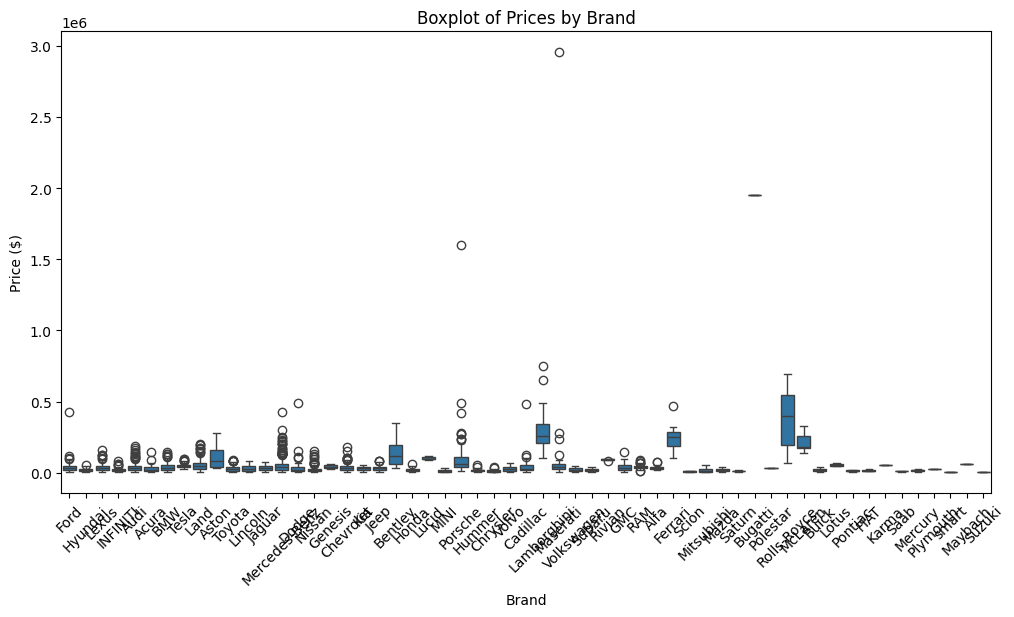

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand', y='price')
plt.title('Boxplot of Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

------------

The boxplot visualizes the distribution of car prices across different brands. Each box represents the interquartile range (IQR) of prices for a specific brand, with the median price marked by a horizontal line inside each box. The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR, while points outside this range are considered outliers (shown as circles). Brands like Rolls-Royce, Bugatti, and Lamborghini have higher median prices and more outliers, indicating a wider range of luxury car prices. Meanwhile, brands like Ford and Hyundai have prices clustered near the lower end, with fewer outliers.

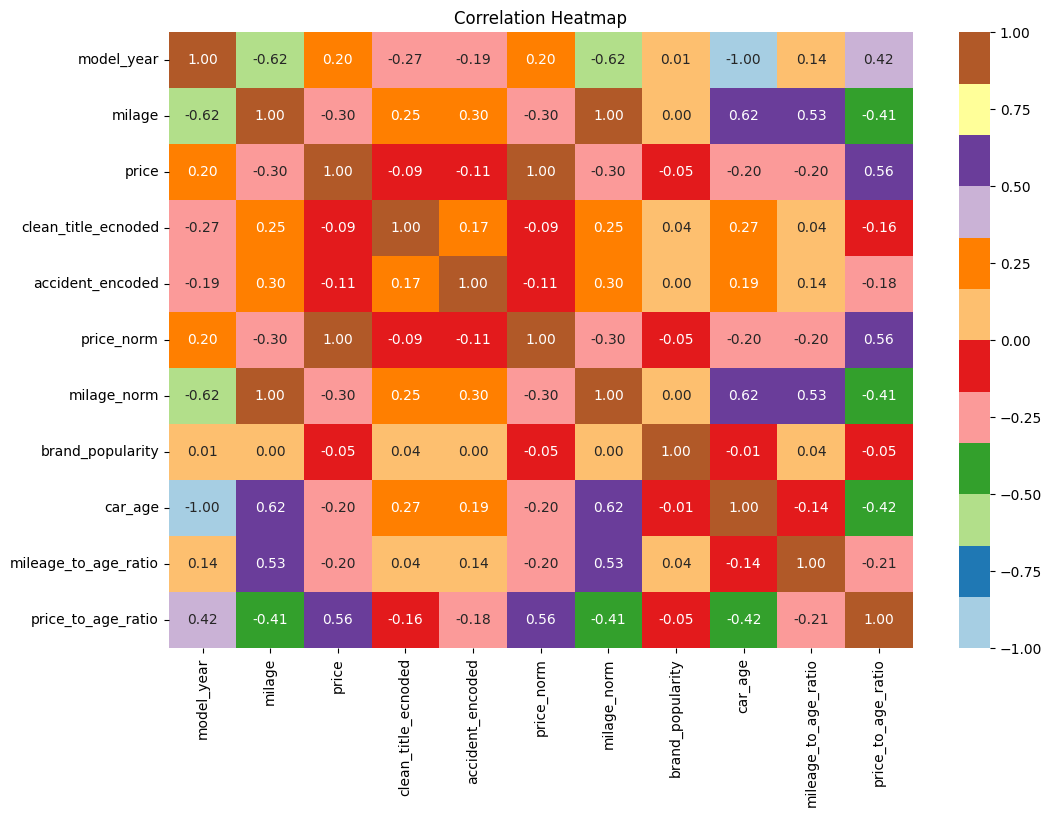

In [38]:
import seaborn as sns
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Paired', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#4- Building The model

In [39]:
list(df.columns)

['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price',
 'clean_title_ecnoded',
 'fuel_type_encoded',
 'accident_encoded',
 'price_norm',
 'milage_norm',
 'mileage_bin',
 'price_category',
 'price_category_encoded',
 'mileage_bin_encoded',
 'brand_popularity',
 'car_age',
 'mileage_to_age_ratio',
 'price_to_age_ratio']

## Neural Networks

we will use grid search and Random search to Systematically tested combinations of hyperparameters, such as the learning rate, batch size, number of units for neural networks.

### Grid search

since our dataset is large and we want to find a pair of cars, using the whole data would produce a very lage number of pairs

we decided to use random subset of the data to use in the model for that reason.

In [52]:
# Define key features
features = ['price_norm', 'milage_norm', 'model_year', 'brand_popularity',
            'fuel_type_encoded', 'accident_encoded', 'clean_title_ecnoded']

# Specify the subset size
subset_size = 1000  # Adjust the number as needed based on your dataset

# Generate all possible car pairs and sample a subset
car_indices = list(df.index)
car_pairs = list(itertools.combinations(car_indices, 2))
subset_pairs = random.sample(car_pairs, subset_size)

# Prepare lists to store the differences in attributes and the labels
pair_data = []
pair_labels = []

for idx1, idx2 in subset_pairs:
    car1 = df.loc[idx1, features].values
    car2 = df.loc[idx2, features].values
    # Calculate the difference between the attributes of two cars
    diff = car1 - car2

    # Append the difference in attributes to the pair_data list
    pair_data.append(diff)

    # Define the label based on the car price
    # Label 1 if car1 is preferred (lower price), 0 otherwise
    label = 1 if df.loc[idx1, 'price'] < df.loc[idx2, 'price'] else 0
    pair_labels.append(label)

# Convert the pair_data and labels into a DataFrame and Series
X = pd.DataFrame(pair_data, columns=features)
y = pd.Series(pair_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:


# Function to build the neural network model
def create_model(hidden_layers=1, neurons=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define a smaller grid for faster exploration
param_grid = {
    'model__hidden_layers': [1, 2],
    'model__neurons': [16, 32],
    'batch_size': [16, 32],
    'epochs': [50],
    'model__learning_rate': [0.001]
}

# Grid search with the corrected feature names
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy achieved: ", grid_result.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters found:  {'batch_size': 16, 'epochs': 50, 'model__hidden_layers': 2, 'model__learning_rate': 0.001, 'model__neurons': 32}
Best accuracy achieved:  0.9750124374606929


based on grid search we found that


**Best parameters found:**  {'batch_size': 16, 'epochs': 50, 'model__hidden_layers': 2, 'model__learning_rate': 0.001, 'model__neurons': 32}


**Best accuracy achieved:**  0.9750124374606929

now we will use these hyperparameters to develop a neural network model to predict car preference.

In [54]:

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
hidden_layers = best_params['model__hidden_layers']
neurons = best_params['model__neurons']
learning_rate = best_params['model__learning_rate']
batch_size = best_params['batch_size']
epochs = best_params['epochs']

# Build the neural network model with the best hyperparameters
def build_best_model(hidden_layers=hidden_layers, neurons=neurons, learning_rate=learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize the model with the best hyperparameters
best_model = build_best_model()

# Train the model
best_model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5380 - loss: 0.7118
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7780 - loss: 0.5166
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.4157
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.3528
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.3622
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.3115
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3177
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.2666
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.2825
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2350
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9092 - loss: 0.2206
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9209 - loss: 0.2226


using grid search we got these results

Test Loss: 0.0403
Test Accuracy: 0.9850

meaning a loss of 0.0403 is indicating that our model is making accurate predictions and has learned effectively from the training data.
while a test accuracy of 0.9850, or 98.5%, is also excellent, suggesting that the model correctly classified 98.5% of the test samples.

### Random search

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Score: 0.9855074812967581
Best Params: {'model__optimizer': 'adam', 'model__neurons': 256, 'epochs': 50, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7090 - loss: 0.5531 - val_accuracy: 0.8254 - val_loss: 0.3834
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8481 - loss: 0.3291 - val_accuracy: 0.8628 - val_loss: 0.3011
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8917 - loss: 0.2414 - val_accuracy: 0.9352 - val_loss: 0.2148
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9311 - loss: 0.1829 - val_accuracy: 0.9426 - val_loss: 0.1620
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9458 - loss: 0.1539 - val_accuracy: 0.9626 - val_loss: 0.1165
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9672 - loss: 0.1108 - val_accuracy: 0.9676 - val_loss: 0.1004
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 0.0944 - val_accuracy: 0.9800 - val_loss: 0.0803
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9819 - loss: 0.0784 - val_accuracy: 0.9651 - va

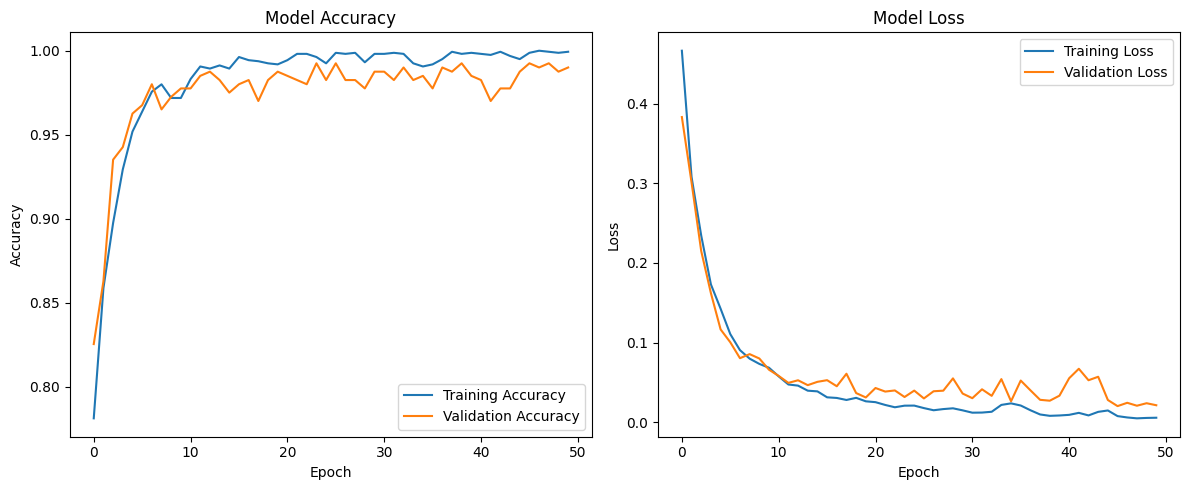

In [57]:

# Set random seed for reproducibility
np.random.seed(0)

# Create two sets of shuffled indices for pairing observations
half_len = len(df) // 2  # Half the dataset length
indices = np.random.permutation(len(df))  # Random permutation of indices

# Split the indices into two halves for comparison
first_indices = indices[:half_len]  # First half
second_indices = indices[half_len:half_len * 2]  # Second half

# Create a paired dataset where each row is a comparison between two cars
df_pairs = pd.DataFrame({
    'price_diff': df['price_norm'].iloc[first_indices].values - df['price_norm'].iloc[second_indices].values,
    'mileage_diff': df['milage_norm'].iloc[first_indices].values - df['milage_norm'].iloc[second_indices].values,
    'model_year_diff': df['model_year'].iloc[first_indices].values - df['model_year'].iloc[second_indices].values,
    'brand_popularity_diff': df['brand_popularity'].iloc[first_indices].values - df['brand_popularity'].iloc[second_indices].values,
    'accident_encoded_1': df['clean_title_ecnoded'].iloc[first_indices].values,
    'accident_encoded_2': df['clean_title_ecnoded'].iloc[second_indices].values,
    'fuel_type_encoded_1': df['fuel_type_encoded'].iloc[first_indices].values,
    'fuel_type_encoded_2': df['fuel_type_encoded'].iloc[second_indices].values,
    'preferred_car': (df['price'].iloc[first_indices].values > df['price'].iloc[second_indices].values).astype(int)
})

# Split the data into features (X) and target variable (y)
X = df_pairs.drop('preferred_car', axis=1)  # Drop target column to get features
y = df_pairs['preferred_car']  # Target: 1 if first car is preferred, 0 otherwise

# Apply feature scaling to ensure that all features contribute equally to the model
scaler = StandardScaler()  # Initialize scaler
X = scaler.fit_transform(X)  # Scale features

# Define a function to build the neural network model
def build_model(neurons=32, optimizer='adam'):
    """Build a Sequential neural network model."""
    model = Sequential([  # Initialize a Sequential model
        Dense(neurons, activation='relu', input_shape=(X.shape[1],)),  # First hidden layer
        Dense(neurons, activation='relu'),  # Second hidden layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    # Compile the model with specified optimizer, loss function, and evaluation metric
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model to use it with scikit-learn's RandomizedSearchCV
model = KerasClassifier(model=build_model, verbose=0)

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    'model__neurons': [32, 64, 128, 256],  # Number of neurons per layer to try
    'model__optimizer': ['adam', 'sgd'],  # Optimizers to experiment with
    'batch_size': [16, 32, 64],  # Batch sizes to test
    'epochs': [10, 20, 30, 50]  # Number of epochs for training
}

# Initialize RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=model,  # Keras model wrapped in KerasClassifier
    param_distributions=param_dist,  # Hyperparameter space
    n_iter=5,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Print progress
    random_state=42,  # Reproducibility
    n_jobs=-1  # Use all available CPU cores
)

# Perform the random search to find the best hyperparameters
random_search_result = random_search.fit(X, y)

# Display the best score and hyperparameters found
print(f"Best Score: {random_search_result.best_score_}")
print(f"Best Params: {random_search_result.best_params_}")

# Extract the best hyperparameters from the search results
best_params = random_search_result.best_params_

# Build the model with the best found hyperparameters
best_model = build_model(
    neurons=best_params['model__neurons'],  # Optimal number of neurons
    optimizer=best_params['model__optimizer']  # Optimal optimizer
)

# Split the data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model with the best hyperparameters and capture the training history
history = best_model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_test, y_test),  # Validation data
    epochs=best_params['epochs'],  # Optimal number of epochs
    batch_size=best_params['batch_size'],  # Optimal batch size
    verbose=1  # Display training progress
)

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate predictions on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Print the confusion matrix and classification report for model evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the training history: accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



Using Random search, Our model performance was so much better!
the model demonstrates outstanding performance with high precision, recall, and F1-scores for both classes, as well as an impressive overall accuracy.

This suggests that Our model is effectively learning the distinguishing features between the two classes and generalizing well to the test data.

Accuracy: 0.99 (99% of the total predictions were correct)
This indicates that the model correctly classified 99% of all instances in the test set, which is an excellent result.

The precision values indicate that 99% of the predicted instances for both classes were correct, while the recall values show the model accurately identified all instances of class 0 and 98% of class 1 instances. The F1-scores being high for both classes reflect a balanced performance in precision and recall.

The overall results from the random search for hyperparameter optimization have proven to be superior to those obtained from the grid search. Several factors could explain this difference in performance, The grid search was conducted on a subset of the data, which represents only a small portion of the entire dataset. This limited representation may not have captured the full range of variability and patterns present in the complete dataset, leading to suboptimal hyperparameter selections and model performance.

Since the grid search was performed on a smaller subset, there is a greater risk of overfitting to that limited data, potentially skewing the results. In contrast, the random search may have had access to a more representative sample, leading to more robust generalization.